In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
df=pd.read_csv("../input/creditcardfraud/creditcard.csv")
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
df.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [13]:
df.shape

(284807, 31)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


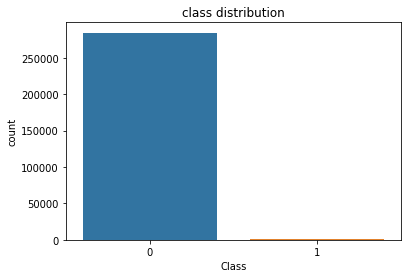

In [26]:
#df['Class'].value_counts().plot(kind='bar')
sns.countplot('Class',data=df)
plt.title("class distribution")
plt.show()

In [22]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [23]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [24]:
print(round(df.Class.value_counts()[0]/len(df)*100,2),'%')
print(round(df.Class.value_counts()[1]/len(df)*100,2),'%')

99.83 %
0.17 %


In [27]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Due to confidentiality issue, original features V1, V2,... V28 have been transformed using PCA, however, my guess is that these features might be credit card number, expiry date, CVV, cardholder name, transaction location, transaction date-time, etc.

► Only features which have not been transformed with PCA are 'Time',  'Amount' and 'Class'.

'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.

The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning.

The Feature 'Class' is the response or target variable and it takes value 1 in case of fraud and 0 otherwise.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


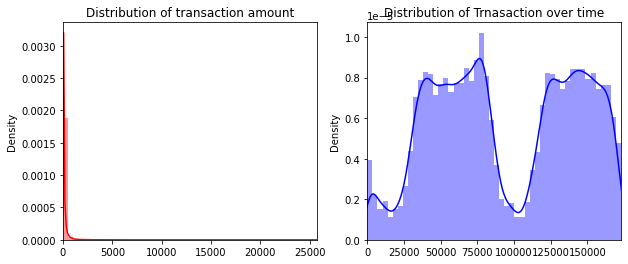

In [34]:
fig,axs=plt.subplots(1,2,figsize=(10,4))

amnt=df.Amount.values
time=df.Time.values

sns.distplot(amnt,ax=axs[0],color='r')
axs[0].set_title("Distribution of transaction amount")
axs[0].set_xlim([min(amnt),max(amnt)])

sns.distplot(time,ax=axs[1],color='b')
axs[1].set_title("Distribution of Trnasaction over time")
axs[1].set_xlim([min(time),max(time)])
plt.show()

<AxesSubplot:>

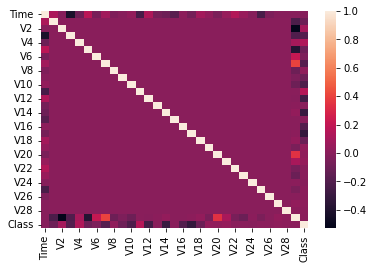

In [43]:
#Plotting a heatmap to visualize the correlation between the variables
sns.heatmap(df.corr())

V17, V14, V12 and V10 are negatively correlated. Notice how the lower these values are, the more likely the end result will be a fraud transaction.

► V2, V4, V11, and V19 are positively correlated. Notice how the higher these values are, the more likely the end result will be a fraud transaction.

In [36]:
df[['Amount','Time']].describe()

,Amount,Time
count,284807.000000,284807.000000
mean,88.349619,94813.859575
std,250.120109,47488.145955
min,0.000000,0.000000
25%,5.600000,54201.500000
50%,22.000000,84692.000000
75%,77.165000,139320.500000
max,25691.160000,172792.000000


Mean transaction is somewhere is 88 and standard deviation is around 250.

► The median is 22 which is very less as compared to mean which signifies that there are outliers or our data is highly positive skewed which is effecting the amount and thus the mean. High Skewness can be handled by using log transformation or boxcox transformation.

► The maximum transaction that was done is of 25,691 and minimum is 0.

In [37]:
# Descriptive statistics of  of frauds transactions
summary = (df[df['Class'] == 1].describe().transpose().reset_index())

summary = summary.rename(columns = {"index" : "feature"})
summary = np.around(summary,3)
summary

,feature,count,mean,std,min,25%,50%,75%,max
0,Time,492.0,80746.807,47835.365,406.000,41241.500,75568.500,128483.000,170348.000
1,V1,492.0,-4.772,6.784,-30.552,-6.036,-2.342,-0.419,2.132
2,V2,492.0,3.624,4.291,-8.402,1.188,2.718,4.971,22.058
3,V3,492.0,-7.033,7.111,-31.104,-8.643,-5.075,-2.276,2.250
4,V4,492.0,4.542,2.873,-1.313,2.373,4.177,6.349,12.115
5,V5,492.0,-3.151,5.372,-22.106,-4.793,-1.523,0.215,11.095
6,V6,492.0,-1.398,1.858,-6.406,-2.502,-1.425,-0.413,6.474
7,V7,492.0,-5.569,7.207,-43.557,-7.965,-3.034,-0.946,5.803
8,V8,492.0,0.571,6.798,-41.044,-0.195,0.622,1.765,20.007
9,V9,492.0,-2.581,2.501,-13.434,-3.872,-2.209,-0.788,3.354


In [38]:
# Descriptive statistics of geniune transactions

summary = (df[df['Class'] == 0].describe().transpose().reset_index())

summary = summary.rename(columns = {"index" : "feature"})
summary = np.around(summary,3)
summary

,feature,count,mean,std,min,25%,50%,75%,max
0,Time,284315.0,94838.202,47484.016,0.000,54230.000,84711.000,139333.000,172792.000
1,V1,284315.0,0.008,1.930,-56.408,-0.918,0.020,1.316,2.455
2,V2,284315.0,-0.006,1.636,-72.716,-0.599,0.064,0.800,18.902
3,V3,284315.0,0.012,1.459,-48.326,-0.885,0.182,1.028,9.383
4,V4,284315.0,-0.008,1.399,-5.683,-0.850,-0.022,0.738,16.875
5,V5,284315.0,0.005,1.357,-113.743,-0.689,-0.053,0.612,34.802
6,V6,284315.0,0.002,1.330,-26.161,-0.767,-0.273,0.400,73.302
7,V7,284315.0,0.010,1.179,-31.765,-0.551,0.041,0.571,120.589
8,V8,284315.0,-0.001,1.161,-73.217,-0.209,0.022,0.326,18.709
9,V9,284315.0,0.004,1.089,-6.291,-0.640,-0.050,0.598,15.595


FRAUDULENT
► Mean transaction is around 122 and standard deviation is around 256.

► Maximum Transaction was 2125 and minimum was 0.

NORMAL
► Mean transaction is around 88 and standard deviation is around 250.

► Maximum Transaction was 25691 and minimum was 0.

This dataset has 492 frauds out of 284,315 transactions. Thus, the dataset is highly unbalanced, the positive class (frauds) account for 0.173% of all transactions.

In [41]:
df[(df['Class']==1)]['Amount'].value_counts().head(10)

1.00     113
0.00      27
99.99     27
0.76      17
0.77      10
0.01       5
2.00       4
3.79       4
2.28       3
12.31      3
Name: Amount, dtype: int64

There are 113 fraud transactions for just one dollar and 27 fraud transaction for 99.99 dollars. Also, there are 27 fraud transaction for zero amount.

► The reason for zero transaction can be the Zero Authorization which is an account verification method for credit cards that is used to verify a cardholders information without charging the consumer.

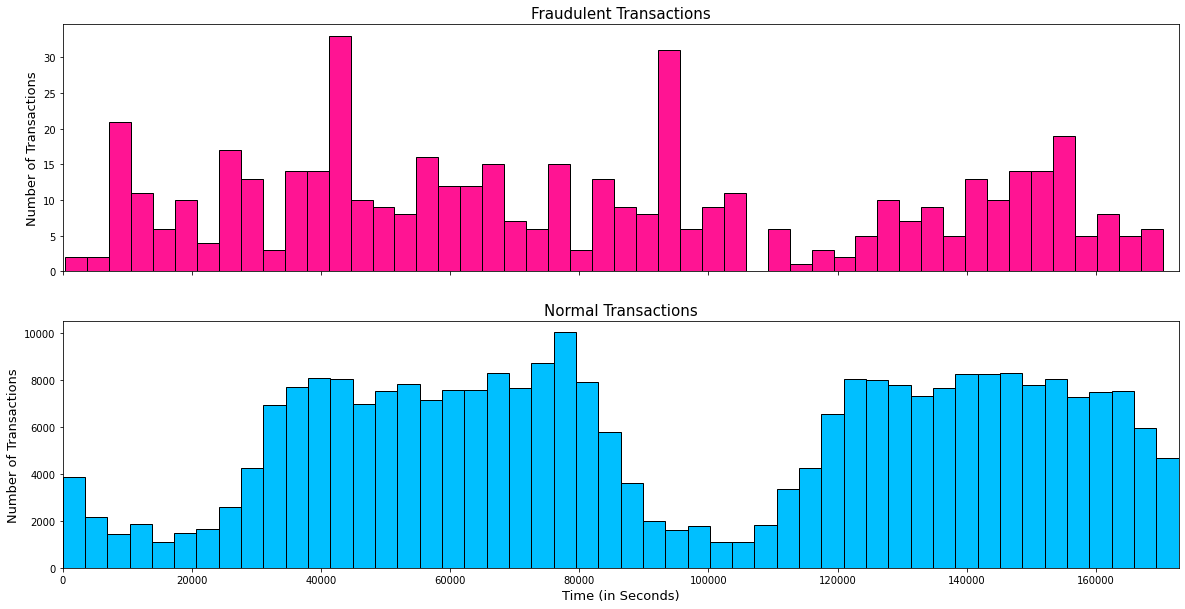

In [44]:
#distribution of classes withr espect to time
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(20,10))

fraud_transactions = df.Time[df.Class == 1]
normal_transactions = df.Time[df.Class == 0]

ax1.hist(fraud_transactions, bins = 50, color='deeppink', edgecolor="black")
ax1.set_xlim([min(fraud_transactions), max(fraud_transactions)])
ax1.set_title('Fraudulent Transactions', fontsize=15)
ax1.set_ylabel("Number of Transactions",  fontsize=13)

ax2.hist(normal_transactions, bins = 50, color='deepskyblue', edgecolor="black")
ax2.set_xlim([min(normal_transactions), max(normal_transactions)])
ax2.set_title('Normal Transactions',  fontsize=15)

ax2.set_xlabel('Time (in Seconds)',  fontsize=13)
ax2.set_ylabel('Number of Transactions',  fontsize=13)

plt.show()

Let's do some feature engineering on time and transform it to minutes and hours to uncover some of the hidden patterns.

In [45]:
# converting seconds to time delta to extract hours and mins

timedelta = pd.to_timedelta(df['Time'], unit='s')

df['mins'] = (timedelta.dt.components.minutes).astype(int)
df['hours'] = (timedelta.dt.components.hours).astype(int)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


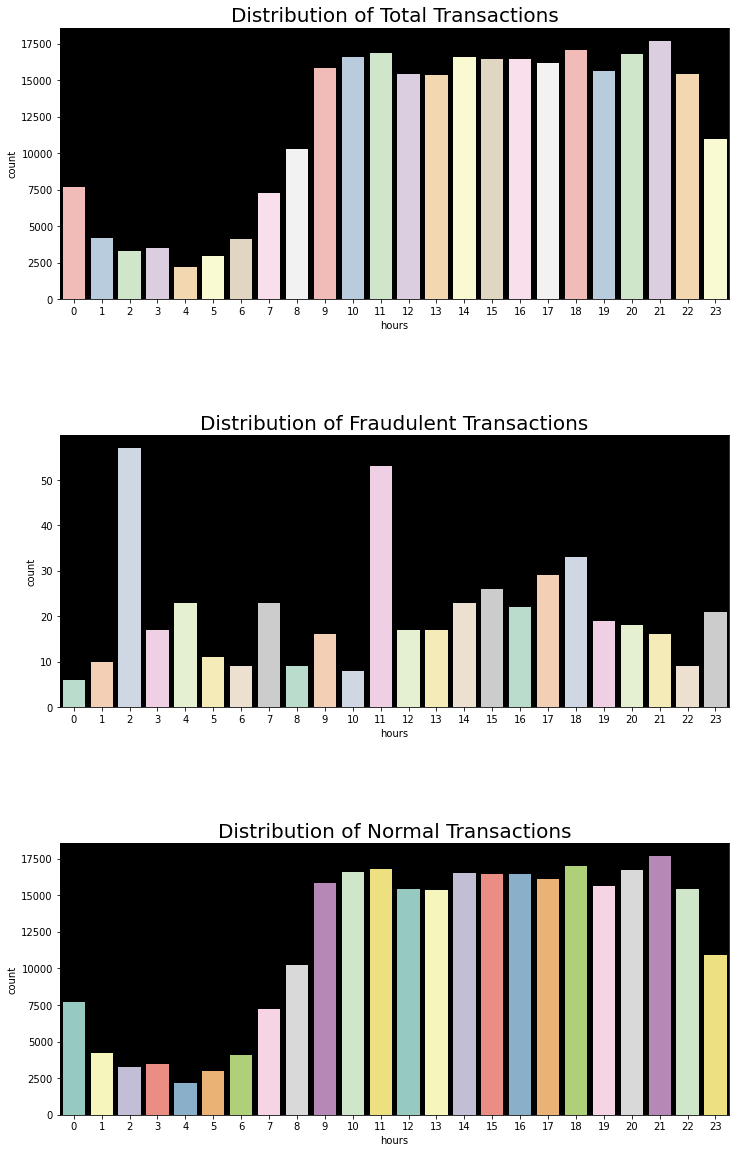

In [46]:
# Countplots for hours vs count of transactions

fig, axs = plt.subplots(3, figsize=(12,20))

fig.subplots_adjust(hspace=.5)

sns.countplot(df['hours'], ax = axs[0], palette="Pastel1")
axs[0].set_title("Distribution of Total Transactions",fontsize=20)
axs[0].set_facecolor("black")

sns.countplot(df[(df['Class'] == 1)]['hours'], ax=axs[1], palette='Pastel2')
axs[1].set_title("Distribution of Fraudulent Transactions", fontsize=20)
axs[1].set_facecolor('black')

sns.countplot(df[(df['Class'] == 0)]['hours'], ax=axs[2], palette='Set3')
axs[2].set_title("Distribution of Normal Transactions", fontsize=20)
axs[2].set_facecolor("black")

plt.show()

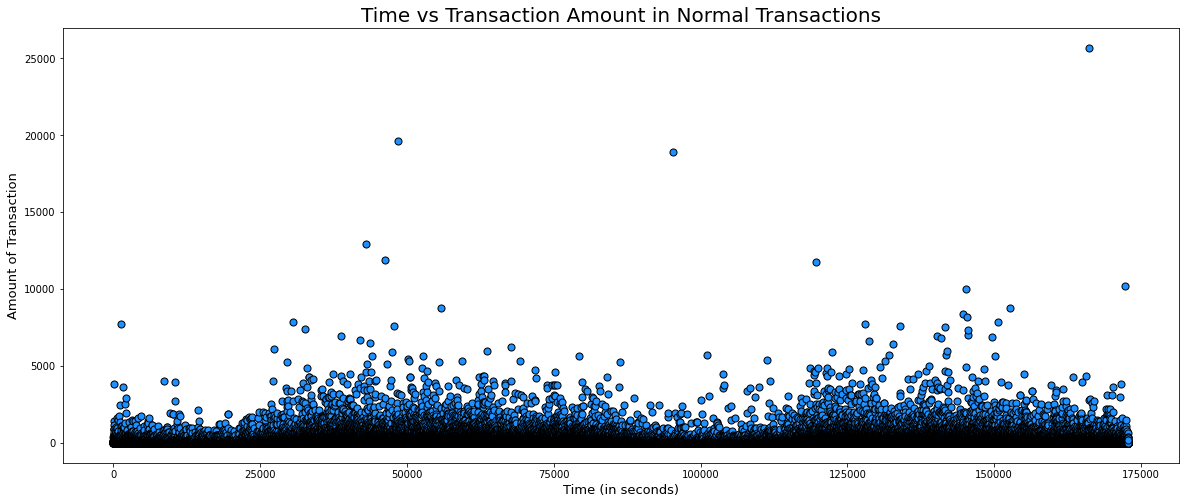

In [47]:
# Scatter plot of Class vs Amount and Time for Normal Transactions 

plt.figure(figsize=(20,8))

fig = plt.scatter(x=df[df['Class'] == 0]['Time'], y=df[df['Class'] == 0]['Amount'], color="dodgerblue", s=50, edgecolor='black')
plt.title("Time vs Transaction Amount in Normal Transactions", fontsize=20)
plt.xlabel("Time (in seconds)", fontsize=13)
plt.ylabel("Amount of Transaction", fontsize=13)

plt.show()

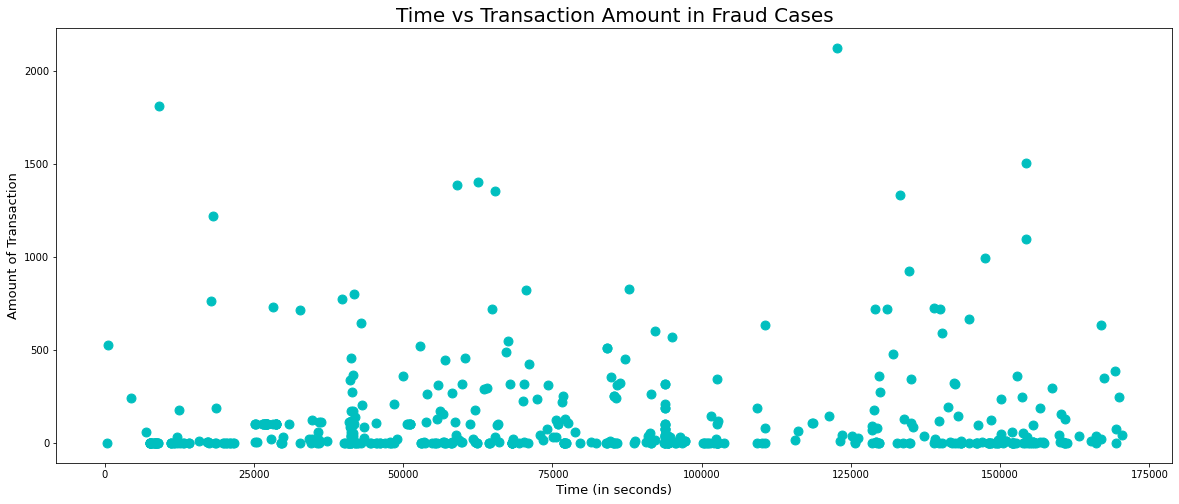

In [48]:
plt.figure(figsize=(20,8))

fig = plt.scatter(x=df[df['Class'] == 1]['Time'], y=df[df['Class'] == 1]['Amount'], color="c", s=80)
plt.title("Time vs Transaction Amount in Fraud Cases", fontsize=20)
plt.xlabel("Time (in seconds)", fontsize=13)
plt.ylabel("Amount of Transaction", fontsize=13)

plt.show()

FRAUDULENT
► There are much more outliers as compared to normal transactions.

► The plot seems to not have any inherent pattern.


NORMAL
► There are a less number of outliers as compared to fraudulent transactions.

► There are a lot of transactions with amount less than 5000.

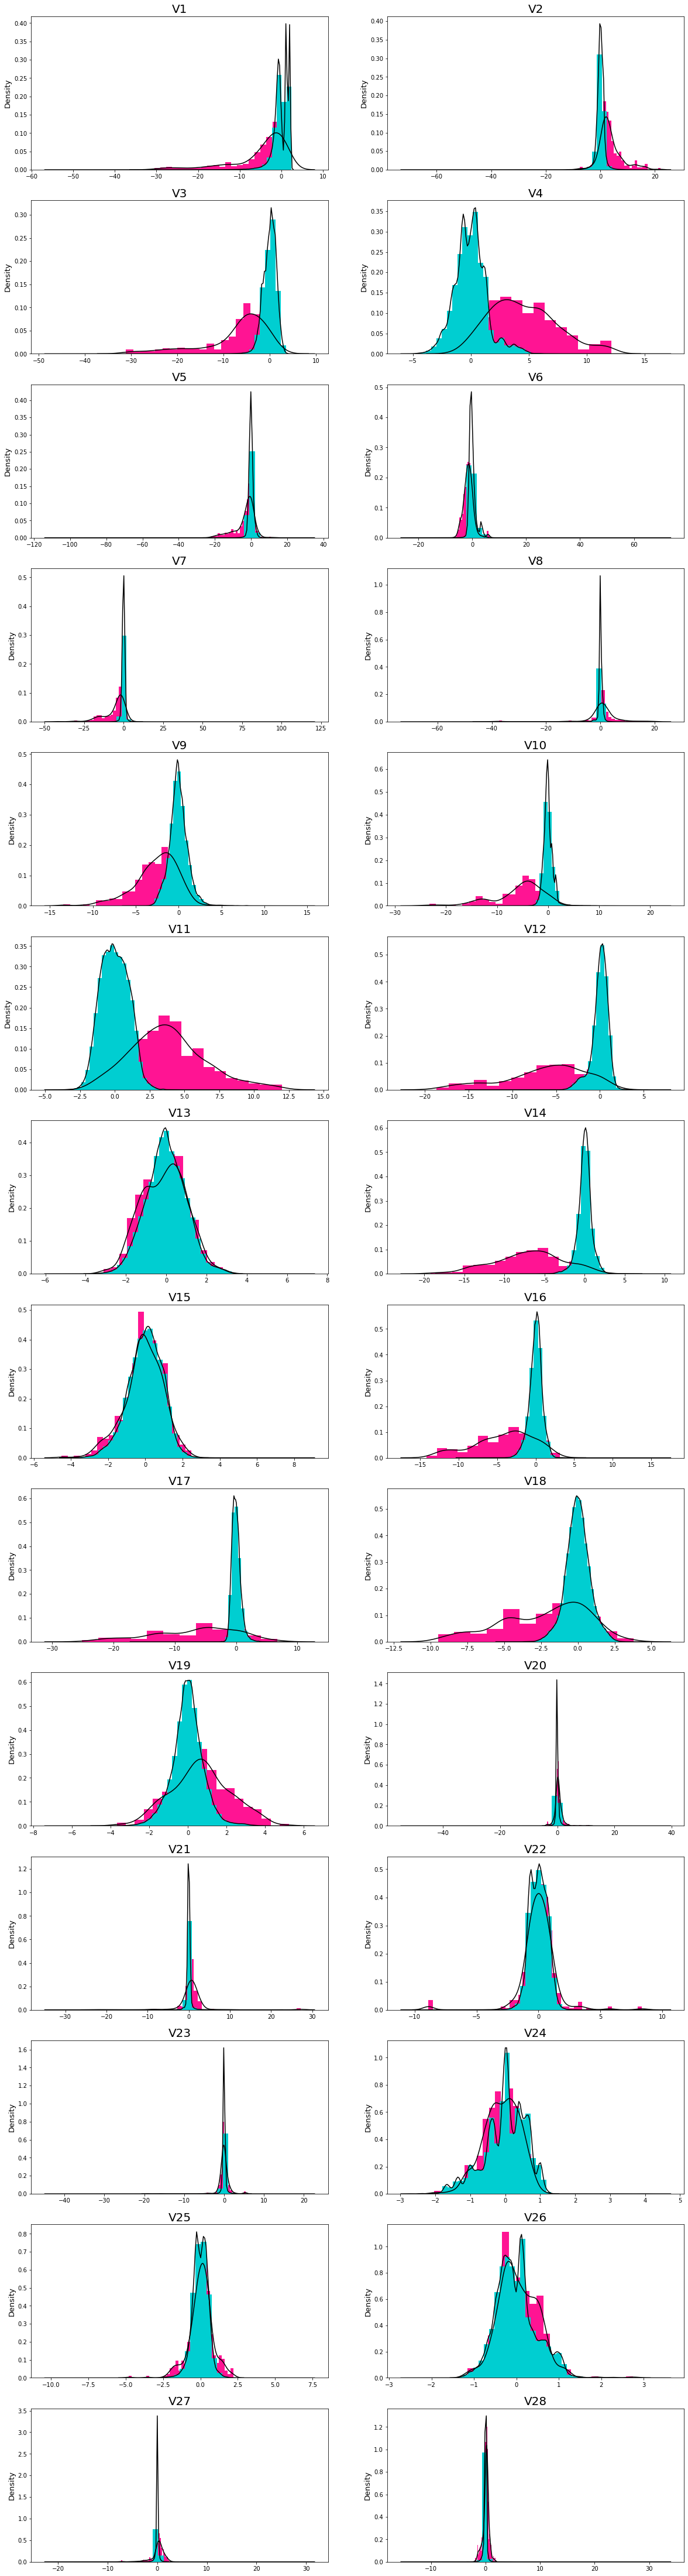

In [50]:
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.gridspec as gridspec
#Looking the V's features
columns = df.iloc[:,1:29].columns

frauds = df.Class == 1
normals = df.Class == 0

grid = gridspec.GridSpec(14, 2)
plt.figure(figsize=(20,20*4))

for n, col in enumerate(df[columns]):
    ax = plt.subplot(grid[n])
    sns.distplot(df[col][frauds], color='deeppink', kde_kws={"color": "k", "lw": 1.5},  hist_kws=dict(alpha=1)) 
    sns.distplot(df[col][normals],color='darkturquoise', kde_kws={"color": "k", "lw": 1.5},  hist_kws=dict(alpha=1))
    ax.set_ylabel('Density', fontsize=13)
    ax.set_title(str(col), fontsize=20)
    ax.set_xlabel('')
plt.show()

► For some of the features we can observe a good selectivity in terms of distribution for the two values of Class: V4, V11 have clearly separated distributions for Class values 0 and 1, V12, V14, V18 are partially separated, V1, V2, V3, V10 have a quite distinct profile, whilst V20-V28 have similar profiles for the two values of Class and thus not very useful in differentiation of both the classes.

► In general, with just few exceptions (Time and Amount), the features distribution for legitimate transactions (values of Class = 0) is centered around 0, sometime with a long queue at one of the extremities. In the same time, the fraudulent transactions (values of Class = 1) have a skewed (asymmetric) distribution.

Outlier Removal
► As we already saw that amount column has a extreme outliers so it necessary to remove them as they can effect the model's performance. We will used Interquartile range to detect outliers which removes anything below the lower limit (25 percentile) and anything above upper limit (75 Percentile).

► Note that, the data we have for fraudulent cases is very low so we wanna keep our cutoff a bit high so as avoid removing much of the fraud cases. Here, as the data is skewed (kind of exponential) so having high cutoff will help us. Let's take the cutoff value as 5.0 instead of 1.5 which is usually used.

In [52]:
# Finding the 3rd and 1st Quantile for Amount Column

Q3 = np.percentile(df['Amount'], 75)
Q1 = np.percentile(df['Amount'], 25)

# setting the cutoff
cutoff = 5.0

# computing the interquartile range
IQR = (Q3 - Q1)

# computing lower bound and upper bound
lower_bound = Q1 - (IQR * cutoff)
upper_bound = Q3 + (IQR * cutoff)

# creating a filter to remove values less than lower bound and greater than
# upper bound
filter_data = (df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)

# filtering data
outliers = df[filter_data]['Amount']
fraud_outliers = df[(df['Class'] == 1) & filter_data]['Amount']
normal_outliers = df[(df['Class'] == 0) & filter_data]['Amount']

print(f"Total Number of Outliers : {outliers.count()}")
print(f"Number of Outliers in Fraudulent Class : {fraud_outliers.count()}")
print(f"No of Outliers in Normal Class : {normal_outliers.count()}")
print(f"Percentage of Fraud amount outliers : {round((fraud_outliers.count()/outliers.count())*100,2)}%")

Total Number of Outliers : 11366
Number of Outliers in Fraudulent Class : 41
No of Outliers in Normal Class : 11325
Percentage of Fraud amount outliers : 0.36%


In [53]:
# dropping the outliers

data = df.drop(outliers.index)
data.reset_index(inplace=True, drop=True)

In [54]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,mins,hours
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,0


In [55]:
data.shape

(273441, 33)

As the amount column is highly skewed so it will be better to apply log transoformation as it can result in nearly normal distribution which is suited for most of the algorithms.

In [56]:
data['Amount'] = np.log(data['Amount'] + 0.001)

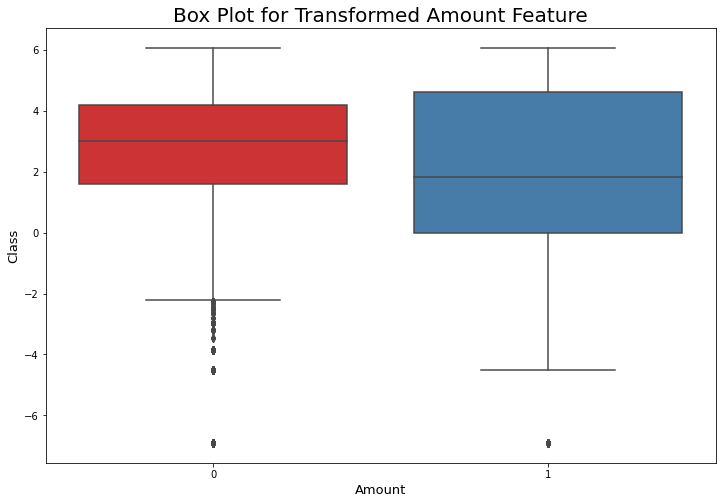

In [57]:
# Box Plot for transformed Amount feature with class

plt.figure(figsize=(12,8))
sns.boxplot(x ="Class", y="Amount", data=data, palette='Set1');
plt.xlabel("Amount", fontsize=13)
plt.ylabel("Class", fontsize=13)
plt.title("Box Plot for Transformed Amount Feature", fontsize=20);

In [58]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report,accuracy_score, roc_curve, precision_score
from sklearn.metrics import confusion_matrix, recall_score, roc_auc_score, f1_score, precision_recall_curve
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import make_pipeline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest

In [59]:
# scaling the time column

robust_scaler = RobustScaler()
data['Time'] = robust_scaler.fit_transform(data['Time'].values.reshape(-1,1))

Handling Class Imbalance
► Imbalanced data is a problem in supervised learning problems which can result is high bias towards majority class. As we have already seen that this data is severly imbalanced so to balance it we can use various techniques such as:

Oversampling
Undersampling
SMOTE
► Out of all these three SMOTE is the most effective so we will go with it, In this technique, instead of simply duplicating data from the minority class, we synthesize new data from the minority class. This is a type of data augmentation for tabular data can be very effective. This approach to synthesizing new data is called the Synthetic Minority Oversampling TEchnique, or SMOTE for short.

In [60]:
# Divide into X and Y after removing useless columns

X = data.drop(['Class','hours','mins'], 1)
Y = data.Class

In [63]:
# Apply SMOTE
from collections import Counter
print(f'Original dataset shape : {Counter(Y)}')

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, Y)

print(f'Resampled dataset shape {Counter(y_res)}')

Original dataset shape : Counter({0: 272990, 1: 451})
Resampled dataset shape Counter({0: 272990, 1: 272990})


As data is completed balanced now. we will try to visulaise the features using dimensionality reduction techniques

In [64]:
# creating a random sample of 5000 points 

X_vis = X_res.sample(5000, random_state=42)
y_vis = y_res.sample(5000, random_state=42)

print(X_vis.shape)
print(y_vis.shape)

(5000, 30)
(5000,)


In [65]:
# training the t-SNE model to reduce dimensionality
# to 3

tsne3d = TSNE(
    n_components=3,
    random_state=42,
    verbose=2,
).fit_transform(X_vis)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.016s...
[t-SNE] Computed neighbors for 5000 samples in 1.026s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.000000
[t-SNE] Computed conditional probabilities in 0.281s
[t-SNE] Iteration 50: error = 83.4200134, gradient norm = 0.0293079 (50 iterations in 6.615s)
[t-SNE] Iteration 100: error = 74.3974457, gradient norm = 0.0036138 (50 iterations in 4.024s)
[t-SNE] Iteration 150: error = 73.1070557, gradient norm = 0.0018578 (50 iterations in 3.820s)
[t-SNE] Iteration 200: error = 72.5729523, gradient norm = 0.0010618 (50 iterations in 3.906s)
[t-SNE] Iteration 250: error = 72.2723236, gradient norm = 0.0008415

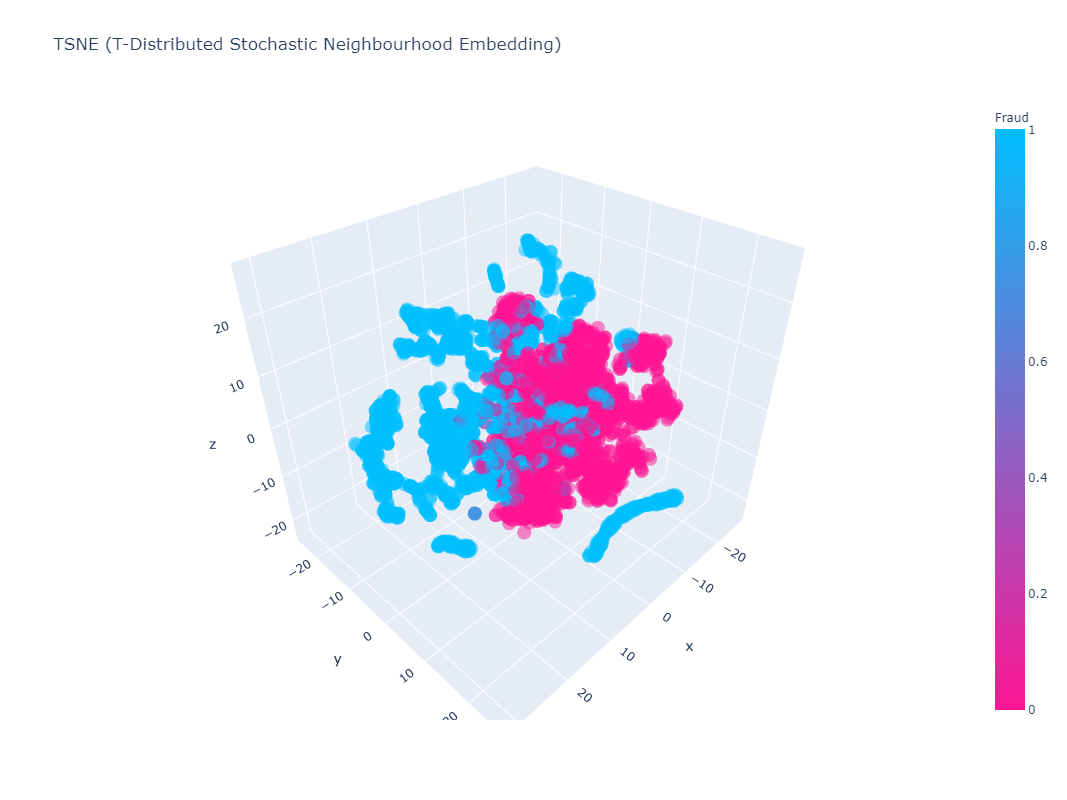

In [68]:
import plotly.graph_objs as go
import plotly
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.offline as py
py.init_notebook_mode(connected=True)
# plotting a 3D scatter plot 

trace1 = go.Scatter3d(
    x=tsne3d[:,0],
    y=tsne3d[:,1],
    z=tsne3d[:,2],
    mode='markers',
    marker=dict(
        color = y_vis,
        colorscale = ['deeppink', 'deepskyblue'],
        colorbar = dict(title = 'Fraud'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.5
    )
)

data=[trace1]

layout = dict(title = 'TSNE (T-Distributed Stochastic Neighbourhood Embedding)',
              showlegend= False, height=800, width=800,)

fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

In [69]:
# creating instance of statrifiedkfold split for 5 splits 
strat = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

# splitting the data
for train_index, test_index in strat.split(X, Y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = Y.iloc[train_index], Y.iloc[test_index]

Train: [ 29350  29392  29422 ... 273438 273439 273440] Test: [    0     1     2 ... 54742 54743 54744]
Train: [     0      1      2 ... 273438 273439 273440] Test: [ 29350  29392  29422 ... 109415 109416 109417]
Train: [     0      1      2 ... 273438 273439 273440] Test: [ 76259  76295  76304 ... 164124 164125 164126]
Train: [     0      1      2 ... 273438 273439 273440] Test: [144542 144548 144549 ... 218769 218770 218771]
Train: [     0      1      2 ... 218769 218770 218771] Test: [203831 204371 204395 ... 273438 273439 273440]


In [70]:
# Turning the splits into an array

original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

Modelling
► In this section, we will finally apply models and classify whether a certain transaction done a particular time is fraud or geniune. Thus, this is a binary classification problem.

► Important thing to note here is that we did SMOTE but we won't use that data, Why?

If we used that data to predict the classes then it will result in a problem know as 'Data Leakage' which is another term for using test data for prediction or cross validation. So, this sounds like a good point to use Pipelines. Pipelines make our life easier by specifying what order should the operations be done on the data.

► One thing we should keep in mind that we might get very high accuracy but we should focus on optimising out f1_score and recall as we want to perform better on fraud cases as they are the most important.

In [71]:
# Creating a utility function to plot correlation matrix and roc_auc_curve

def show_metrics(model, y_test, y_pred):
    fig = plt.figure(figsize=(20, 8))

    # Confusion matrix
    ax = fig.add_subplot(121)
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, annot_kws={"size": 16}, fmt='g', 
                cmap='Set3', linewidths=1, linecolor='white')

    
    # labels, title and ticks
    ax.set_xlabel('Predicted labels', fontsize=15);
    ax.set_ylabel('True labels', fontsize=15); 
    ax.set_title("Confusion Matix", fontsize=20) 
    ax.xaxis.set_ticklabels(['No Fraud', 'Fraud'], fontsize=12); 
    ax.yaxis.set_ticklabels(['Fraud', 'No Fraud'], fontsize=12);

    # ROC Curve
    fig.add_subplot(122)
    
    
    auc_roc = roc_auc_score(y_test, model.predict(original_Xtest))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(original_Xtest)[:,1])

    plt.plot(fpr, tpr, color='darkturquoise', lw=2, marker='o', label='Trained Model (area = {0:0.3f})'.format(auc_roc))
    plt.plot([0, 1], [0, 1], color='deeppink', lw=2, linestyle='--', label= 'No Skill (area = 0.500)')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=13)
    plt.ylabel('True Positive Rate', fontsize=13)
    plt.title('Receiver operating characteristic', fontsize=20)
    plt.legend(loc="lower right")
    plt.show()

Logistic Regression
► Let's start off with a simple model like Linear Regression. Note that I will be doing cross validation using Randomized search as the data is very huge and we will do this cross validation after splitting to avoid Data Leakage as discussed above.

In [72]:
# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# specifying the parameter grid for logistic regression
log_reg_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Applying RandomsearchCV to find best model
rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)


# iterating over all the splits
for train, test in strat.split(original_Xtrain, original_ytrain):
    
    # create pipeline with smote and the model 
    # sampling_strategy = minority because we want to only resample the minority class
    pipeline = make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg)
    
    # fit the pipeline
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    
    # finding mean for all the necessary measures to evaluate performance
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))


In [73]:
print("Accuracy: {0:0.2f}%".format(np.mean(accuracy_lst)*100))
print("Precision: {0:0.2f}".format(np.mean(precision_lst)))
print("Recall: {0:0.2f}".format(np.mean(recall_lst)))
print("f1 Score: {0:0.2f}".format(np.mean(f1_lst)))

Accuracy: 97.49%
Precision: 0.07
Recall: 0.91
f1 Score: 0.13


In [74]:
# predict on test set

y_pred = best_est.predict(original_Xtest)

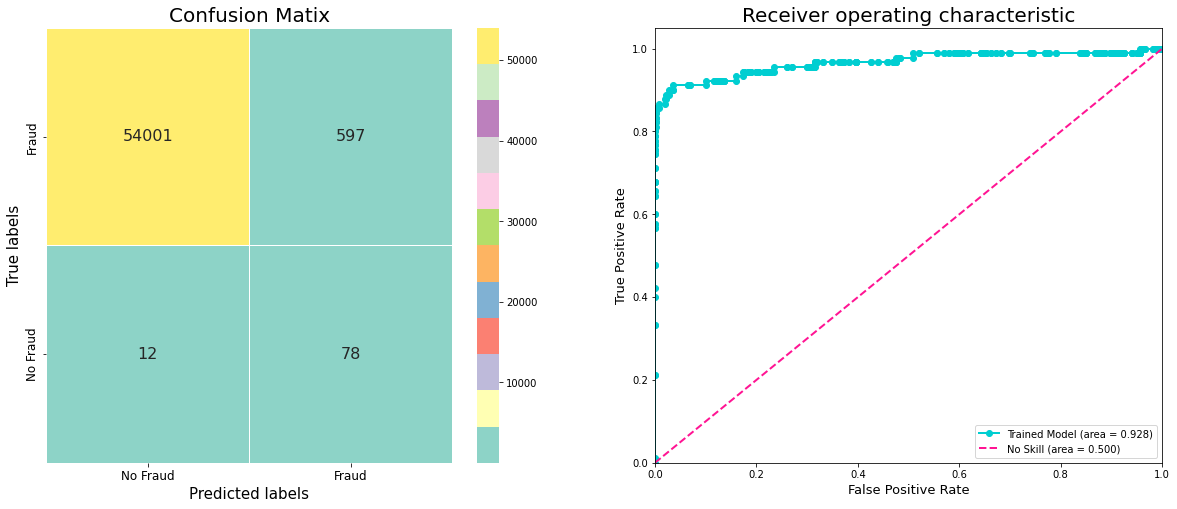

In [75]:
# plot confusion matrix and ROC curve

show_metrics(best_est, original_ytest, y_pred)

Random Forest Classifier
► Now, let's try something which can take account of complex realationships. There are many such models but Random forest is bit better as it is a ensemble model and focuses on reducing variance i.e overfitting without much effecting the bias which is all we want. Also, this algorithm works in time complexity, O(d.n.log(n)) where d is the number of features.

► I have shown the best parameters after GridsearchCV and not the whole process itself as it is very time consuming and takes forever so you can try it yourself.

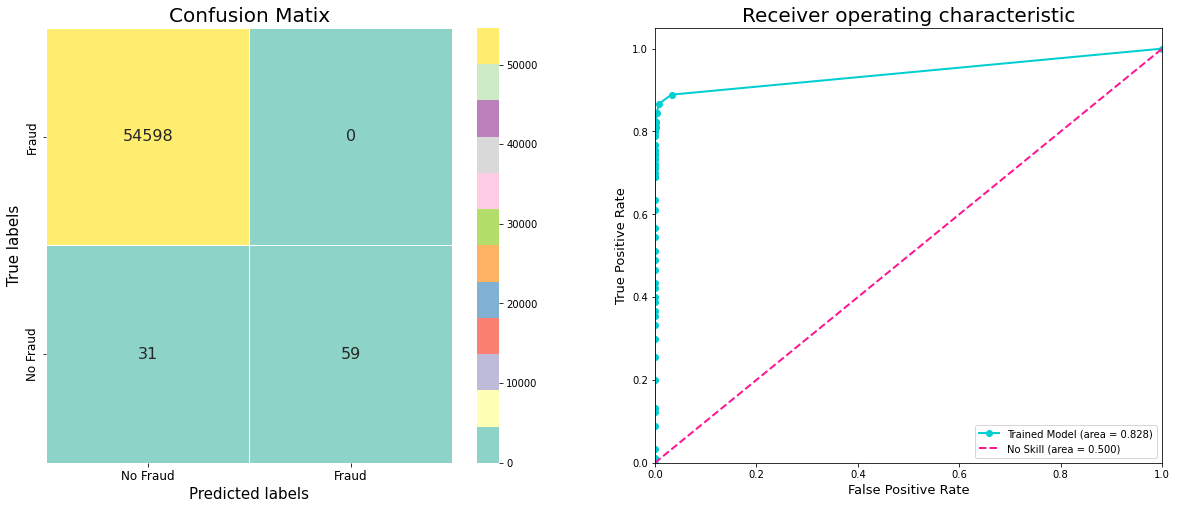

In [76]:
# Random forest Classifier
rf_cfl = RandomForestClassifier(n_estimators = 200, 
                                 max_features = 3, 
                                 min_samples_leaf = 1, 
                                 min_samples_split = 2, 
                                 n_jobs = -1,
                                random_state = 42)

rf_cfl.fit(original_Xtrain, original_ytrain)
y_pred = rf_cfl.predict(original_Xtest)
show_metrics(rf_cfl, original_ytest, y_pred)

In [77]:
print('Accuracy :{0:0.5f}'.format(accuracy_score(y_pred , original_ytest))) 
print('AUC : {0:0.5f}'.format(roc_auc_score(original_ytest , y_pred)))
print('Precision : {0:0.5f}'.format(precision_score(original_ytest , y_pred)))
print('Recall : {0:0.5f}'.format(recall_score(original_ytest , y_pred)))
print('F1 : {0:0.5f}'.format(f1_score(original_ytest , y_pred)))

Accuracy :0.99943
AUC : 0.82778
Precision : 1.00000
Recall : 0.65556
F1 : 0.79195


Precision and accuracy are good but the recall is pretty low due the which the model is not performing well on fraudulent data.

it is able to seperate almost 80% of the sample data 